# 4a. Analyzing and Generating Corpus with both Retracted and Non-Retracted Text

## Introduction

This Notebook **generates the corpus of abstract text** taht we will use to train our models. Additionally, it **analyzes and compares the country and year distribution of both the retracted and non-retracted papers** in our corpus. The purpose of this analysis is to ensure that these distribution is similar enough for both sets of papers, so as to avoid introducing any biases in our tool.

The Notebook takes as input the abstracts for retracted and non-retracted papers that were extracted in **Notebook 2c** and **Notebook 3c**. The output that it produces will in turn be used by **Notebook 4b** to train our machine learning model.

The **workflow** has thus been set as follows:

- Input: **two .csv files** with abstracts from retracted papers and non-retracted papers, respectively. 
- Output: **one .csv file** with our whole corpus, which combines abstracts from both retracted and non-retracted papers.


## Input / Output Parameters:

Input parameters:

In [2]:

# File path to abstracts of retracted papers

file_path_retracted = '../data/abstracts/cell_biology/retracted/retracted_cell_biology_abstracts.csv'

# File path to abstracts of non-retracted papers

file_path_non_retracted = '../data/abstracts/cell_biology/non_retracted/non_retracted_cell_biology_abstracts.csv'


Output parameters:

In [3]:

# File path for output file

output_path = "../data/final_corpus.csv"


## Importing Required Libraries

In [4]:

# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Loading Abstracts of Retracted Papers

Let us start by loading the abstracts of our retracted papers into a data frame:

In [5]:

# Load abstracts of non-retracted papers from .csv file

df_retracted = pd.read_csv(file_path_retracted, delimiter='|')

# Visualize first few entries for verification

df_retracted.head()


,abstract_text,target,doi,country,year,ret_flag
0,"""Vascular endothelial growth factor receptor-1...",1,10.1371_journal.pone.0065217,CN,2013,False
1,"""Type 1 diabetes mellitus (T1DM) is a systemic...",1,10.1002_ptr.6533,CN,2019,False
2,"""The study was designed to elucidate the regul...",1,10.1002_jcb.29429,CN,2019,False
3,"""Hepatocellular carcinoma (HCC) is the third l...",1,10.1155_2014_486407,TW,2014,False
4,"""BACKGROUND Retinoblastoma is a rare malignanc...",1,10.12659_MSM.914242,CN,2019,False


As we mentioned in previous notebooks, retracted papers sometimes include "retraction notices" in their abstract, stating that the paper in question has been removed from the published record. These notices typically include words such as "retracted" etc. which would cause data leakeage if we were to feed them to our model. We will thus drop all such papers from our data frame, leaving papers for which no retraction notices has been left only:

In [6]:

# Drop rows with retraction notices from our data frame

df_retracted = df_retracted[df_retracted['ret_flag'] != True]

# Display resulting data frame for verification

df_retracted.head()


,abstract_text,target,doi,country,year,ret_flag
0,"""Vascular endothelial growth factor receptor-1...",1,10.1371_journal.pone.0065217,CN,2013,False
1,"""Type 1 diabetes mellitus (T1DM) is a systemic...",1,10.1002_ptr.6533,CN,2019,False
2,"""The study was designed to elucidate the regul...",1,10.1002_jcb.29429,CN,2019,False
3,"""Hepatocellular carcinoma (HCC) is the third l...",1,10.1155_2014_486407,TW,2014,False
4,"""BACKGROUND Retinoblastoma is a rare malignanc...",1,10.12659_MSM.914242,CN,2019,False


## Loading Abstracts of Non-Retracted Papers

Let us now turn our attention to our non-retracted papers. We will start by loading the .csv file with the text of our non-retracted papers into a separate dataframe:

In [7]:

# Load the .csv file with abstracts of non-retracted papers into data frame

df_non_retracted = pd.read_csv(file_path_non_retracted, delimiter='|')

# Display first few rows of data frame for verification

df_non_retracted.head()


,abstract_text,target,doi,country,year,ret_flag
0,"""Src kinase mediates growth factor signaling a...",0,10.1073_pnas.0701077104,US,2007,False
1,"""Histidine-rich calcium binding protein (HRC) ...",0,10.7150_ijms.60610,CN,2021,False
2,"""Significance Animal cells undergo a remarkabl...",0,10.1073_pnas.1420585112,GB,2015,False
3,"""Inositol-requiring enzyme 1 (IRE1) is the mos...",0,10.1074_jbc.m110.199737,US,2011,False
4,"""Abstract Hepatocellular carcinoma (HCC) is th...",0,10.1038_s41388-020-01417-6,CN,2020,False


And once again drop papers with words such as "retracted" etc. in their abstract from our data frame:

In [8]:

# Drop rows where 'ret_flag' is True 

df_non_retracted = df_non_retracted[df_non_retracted['ret_flag'] != True]

# Display resulting data frame

df_non_retracted.head()


,abstract_text,target,doi,country,year,ret_flag
0,"""Src kinase mediates growth factor signaling a...",0,10.1073_pnas.0701077104,US,2007,False
1,"""Histidine-rich calcium binding protein (HRC) ...",0,10.7150_ijms.60610,CN,2021,False
2,"""Significance Animal cells undergo a remarkabl...",0,10.1073_pnas.1420585112,GB,2015,False
3,"""Inositol-requiring enzyme 1 (IRE1) is the mos...",0,10.1074_jbc.m110.199737,US,2011,False
4,"""Abstract Hepatocellular carcinoma (HCC) is th...",0,10.1038_s41388-020-01417-6,CN,2020,False


## Analyzing Country and Year Distribution of both Retracted and Non-Retracted Papers

Before we go on to , we will analyze the year and country distribution for both our retracted and our non-retracted papers. The extraction process for our non-retracted text was designed so as to make sure. We shall start by creating a data frame that tells us how many retracted papers there are for each country and year:

In [9]:

# Calculate counts per year and country for retracted papers

df_retracted_count = df_retracted.groupby(['country', 'year']).size().reset_index(name='retracted_count')

# Obtain total number of retracted papers for confirmation

print("Total number of retracted papers is:", df_retracted_count["retracted_count"].sum())

# Visualize result

df_retracted_count.head()


Total number of retracted papers is: 6294


,country,year,retracted_count
0,AR,2009,1
1,AR,2011,2
2,AR,2013,2
3,AT,2000,1
4,AT,2009,1


And same about our non-retracted papers:

In [11]:

# Calculate value counts per year and country for non-retracted papers

df_non_retracted_count = df_non_retracted.groupby(['country', 'year']).size().reset_index(name='non_retracted_count')

# Obtain total number of non-retracted papers for confirmation

print("Total number of non-retracted papers is:", df_non_retracted_count["non_retracted_count"].sum())

# Visualize result

df_non_retracted_count


Total number of non-retracted papers is: 6689


,country,year,non_retracted_count
0,AR,2010,1
1,AT,2003,1
2,AT,2009,2
3,AT,2010,1
4,AT,2012,2
...,...,...,...
671,ZA,2017,1
672,ZA,2018,1
673,ZA,2020,2
674,ZA,2022,1


It will be useful to display these distributions in a bar plot so that we can have an intuitive sense of whether they are similar to each other or not:

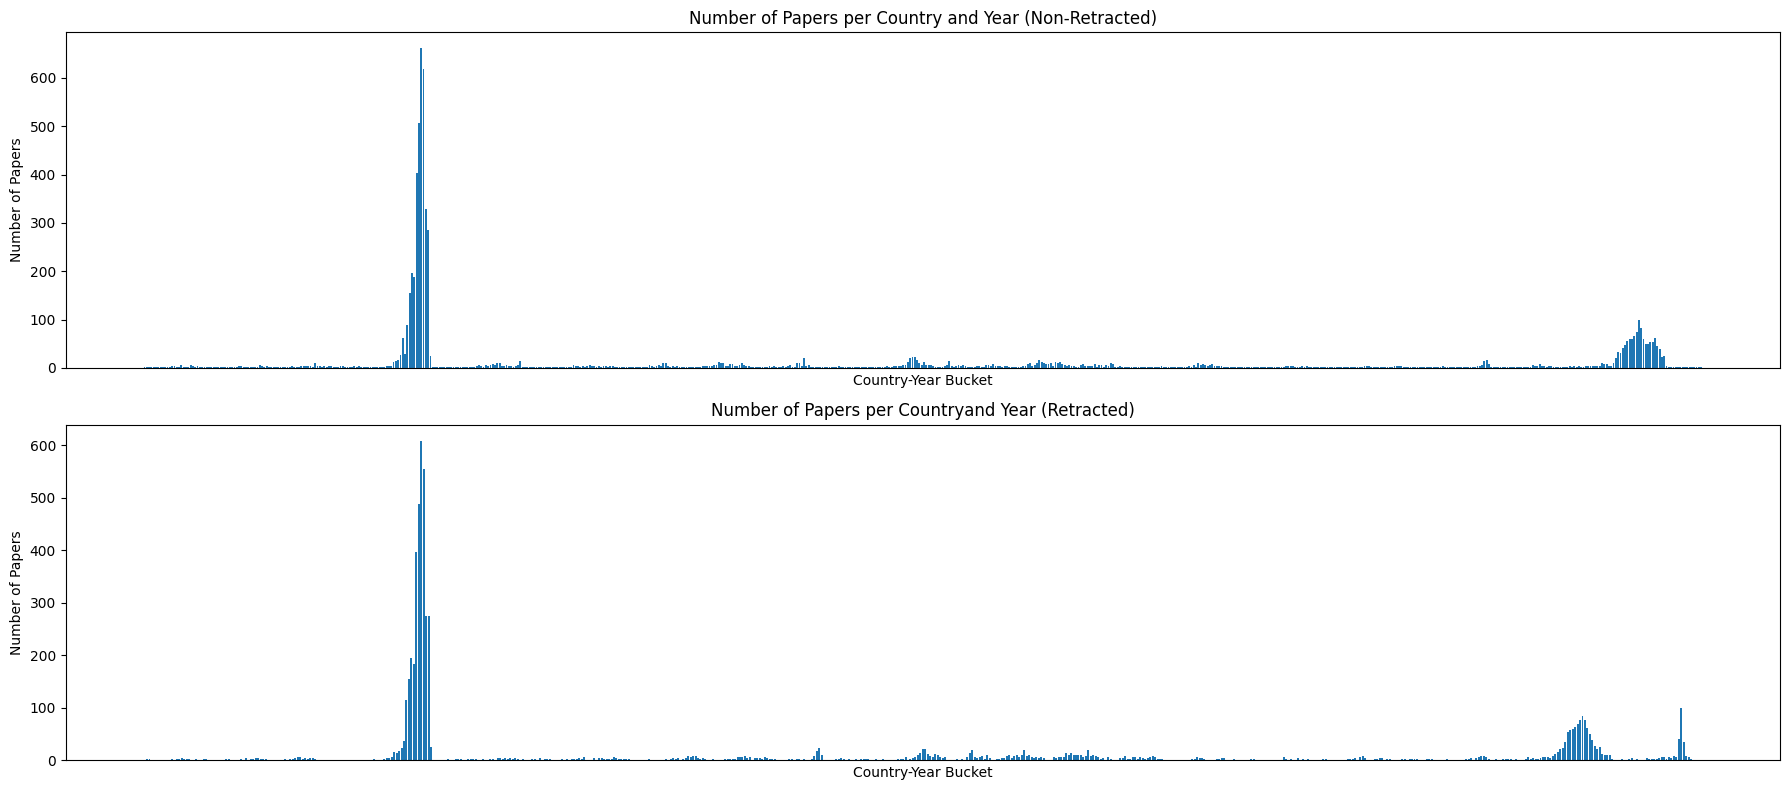

In [14]:

# Creating plot 

plt.figure(figsize=(18, 8))

# Create subplot for non-retracted papers

plt.subplot(2, 1, 1)
plt.bar(df_non_retracted_count['country'] + ' ' + df_non_retracted_count['year'].astype(str), df_non_retracted_count['non_retracted_count'])
plt.title('Number of Papers per Country and Year (Non-Retracted)')
plt.xlabel('Country-Year Bucket')
plt.ylabel('Number of Papers')
plt.xticks([]) 

# Create second subplot for retracted papers

plt.subplot(2, 1, 2)
plt.bar(df_retracted_count['country'] + ' ' + df_retracted_count['year'].astype(str), df_retracted_count['retracted_count'])
plt.title('Number of Papers per Countryand Year (Retracted)')
plt.xlabel('Country-Year Bucket')
plt.ylabel('Number of Papers')
plt.xticks([]) 


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In order to obtain a more reliable comparison, we can create a single data frame that stores the number of both retracted and non-retracted papers for each country and year bucket: 

In [29]:

# Merge dataframes for retracted and non-retracted papers

df_differences = df_retracted_count.merge(df_non_retracted_count, on=['country', 'year'], how='outer').fillna(0)

# Add colummn with difference in count between retracted and non-retracted

df_differences['difference'] = df_differences['retracted_count'] - df_differences['non_retracted_count']

# Add column with percentage that difference represents over the total number of papers in each bucket
# Beware of possible divisions and multiplications by zero

df_differences["difference_percentage"] = (df_differences["difference"] / df_differences[["retracted_count", "non_retracted_count"]].replace(0, np.nan).max(axis=1) * 100)

# Visualize resulting data frame

df_differences


,country,year,retracted_count,non_retracted_count,difference,difference_percentage
0,AR,2009,1.0,0.0,1.0,100.0
1,AR,2010,0.0,1.0,-1.0,-100.0
2,AR,2011,2.0,0.0,2.0,100.0
3,AR,2013,2.0,0.0,2.0,100.0
4,AT,2000,1.0,0.0,1.0,100.0
...,...,...,...,...,...,...
851,ZA,2018,0.0,1.0,-1.0,-100.0
852,ZA,2020,0.0,2.0,-2.0,-100.0
853,ZA,2022,0.0,1.0,-1.0,-100.0
854,ZM,2020,0.0,1.0,-1.0,-100.0


This will allow us forst of all to plot the number of retracted and non-retracted papers for each country-year bucket on the same plot. We will restrict the plot to the largest buckets in the number of either retracted or non-retracted papers that they contain to ease our visualization:

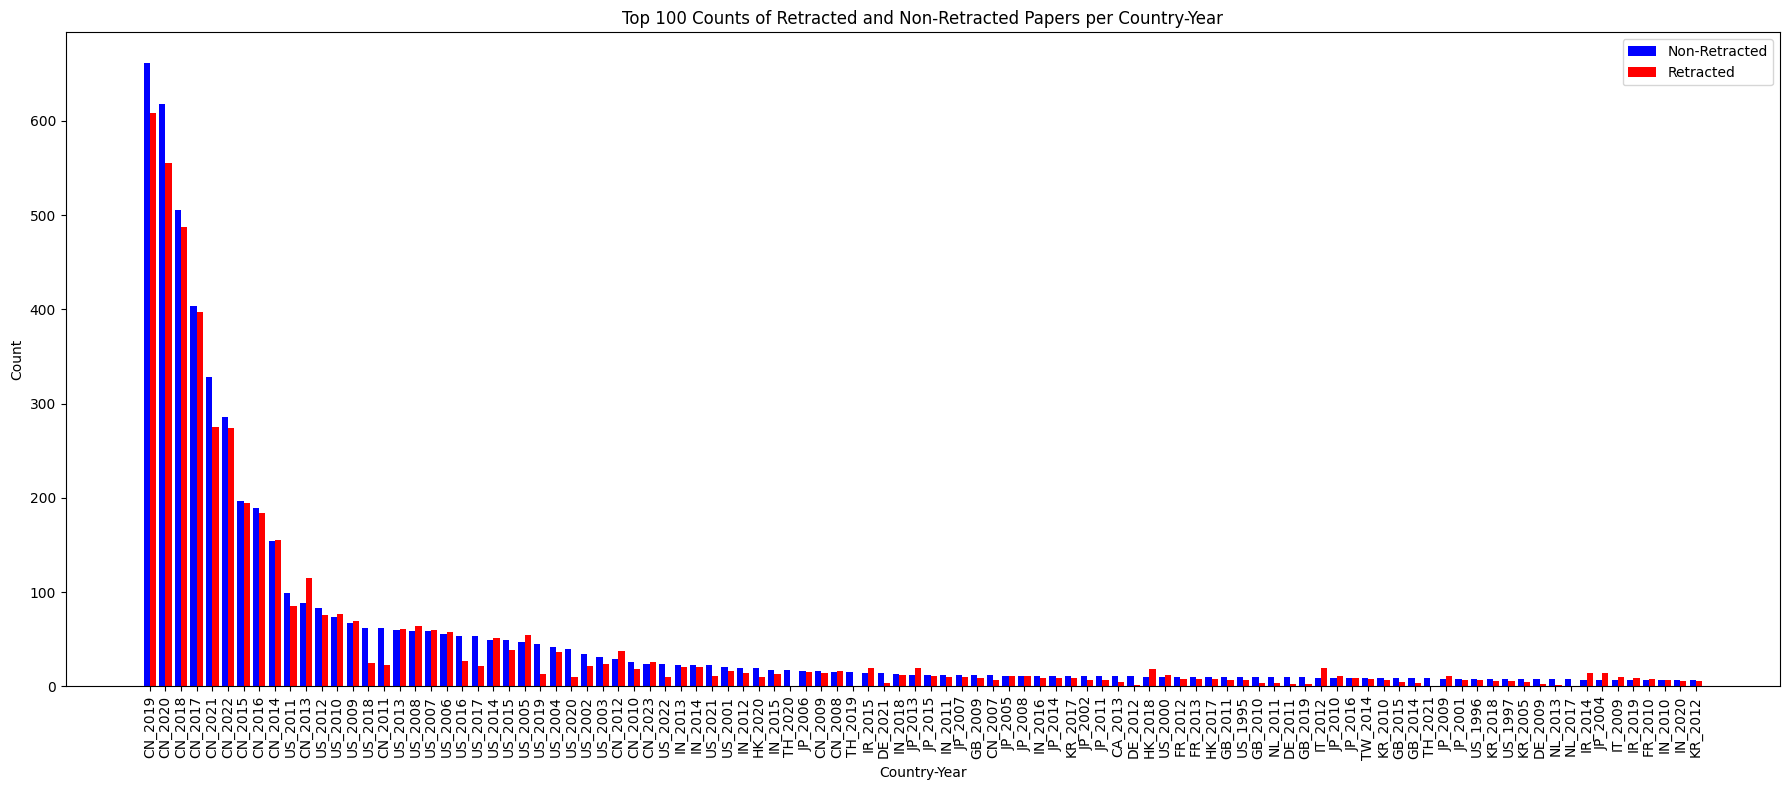

In [58]:
# Aggregate data to get total counts per country and year

df_country_counts = df_differences.groupby(['country', 'year']).sum(numeric_only=True).reset_index()

# Select top 100 entries based on the highest total counts (sum of non-retracted and retracted)

df_most_papers = df_country_counts.nlargest(100, ['non_retracted_count', 'retracted_count'])

# Generate unique x positions for each country-year pair

x_labels = [f"{row['country']}_{row['year']}" for _, row in df_most_papers.iterrows()]
x_positions = np.arange(len(x_labels))

# Initialize plot

plt.figure(figsize=(18, 8))

# Plot bars for non-retracted and retracted counts

plt.bar(x_positions - 0.2, df_most_papers['non_retracted_count'], width=0.4, label='Non-Retracted', color='blue')
plt.bar(x_positions + 0.2, df_most_papers['retracted_count'], width=0.4, label='Retracted', color='red')

# Formatting

plt.title('Top 100 Counts of Retracted and Non-Retracted Papers per Country-Year')
plt.xlabel('Country-Year')
plt.ylabel('Count')
plt.xticks(x_positions, x_labels, rotation=90)
plt.legend()
plt.tight_layout()

# Show the plot

plt.show()


Secondly, we can now also plot the difference in the number of retracted and non-retracted papers for each country-year bucket, expressed both as an absolute magnitude and as a percentage of the total number of papers in each bucket:

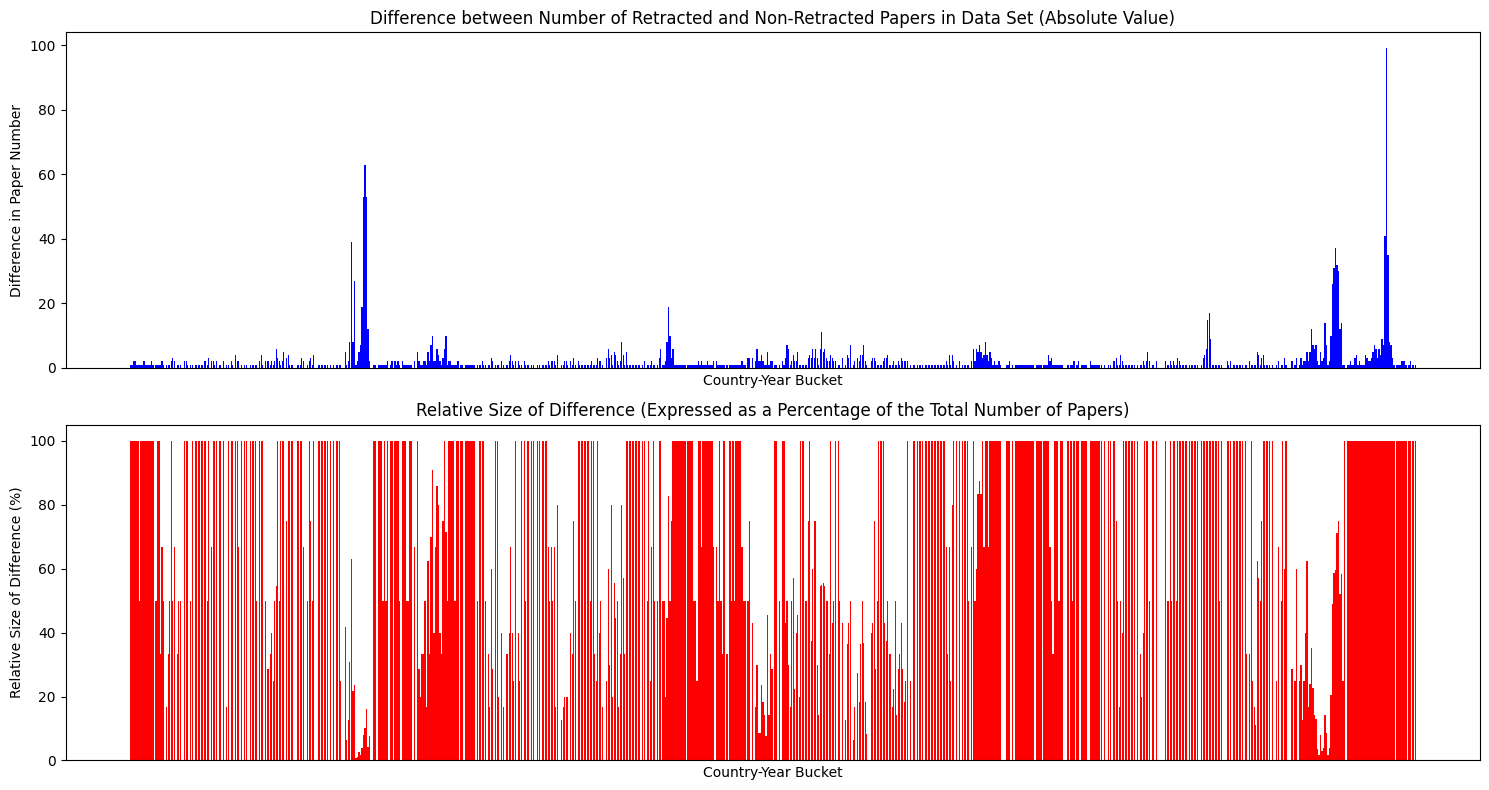

In [54]:

# Create plot

plt.figure(figsize=(15, 8))

# Generate x-axis positions

x_labels = df_merged['country'] + ' ' + df_merged['year'].astype(str)
x_positions = np.arange(len(x_labels))

# Create bar subplot for absolute magnitude of difference

plt.subplot(2, 1, 1)
plt.bar(x_positions, abs(df_differences['difference']), color='blue')
plt.title('Difference between Number of Retracted and Non-Retracted Papers in Data Set (Absolute Value)')
plt.xlabel('Country-Year Bucket')
plt.ylabel('Difference in Paper Number')
plt.xticks([])  

# Create line subplot for percentage value

plt.subplot(2, 1, 2)
plt.bar(x_positions, abs(df_differences['difference_percentage']), color='red')
plt.title('Relative Size of Difference (Expressed as a Percentage of the Total Number of Papers)')
plt.xlabel('Country-Year Bucket')
plt.ylabel('Relative Size of Difference (%)')
plt.xticks([])  

# Adjust layout

plt.tight_layout()

# Show the plot

plt.show()

Perhaps more informatively, we can plot the absolute and the relative size of the difference between the number of retracted and non-retracted papers in a single plot, restricting ourselves once again only to the buckets with the greatest differences considered as absolute values:

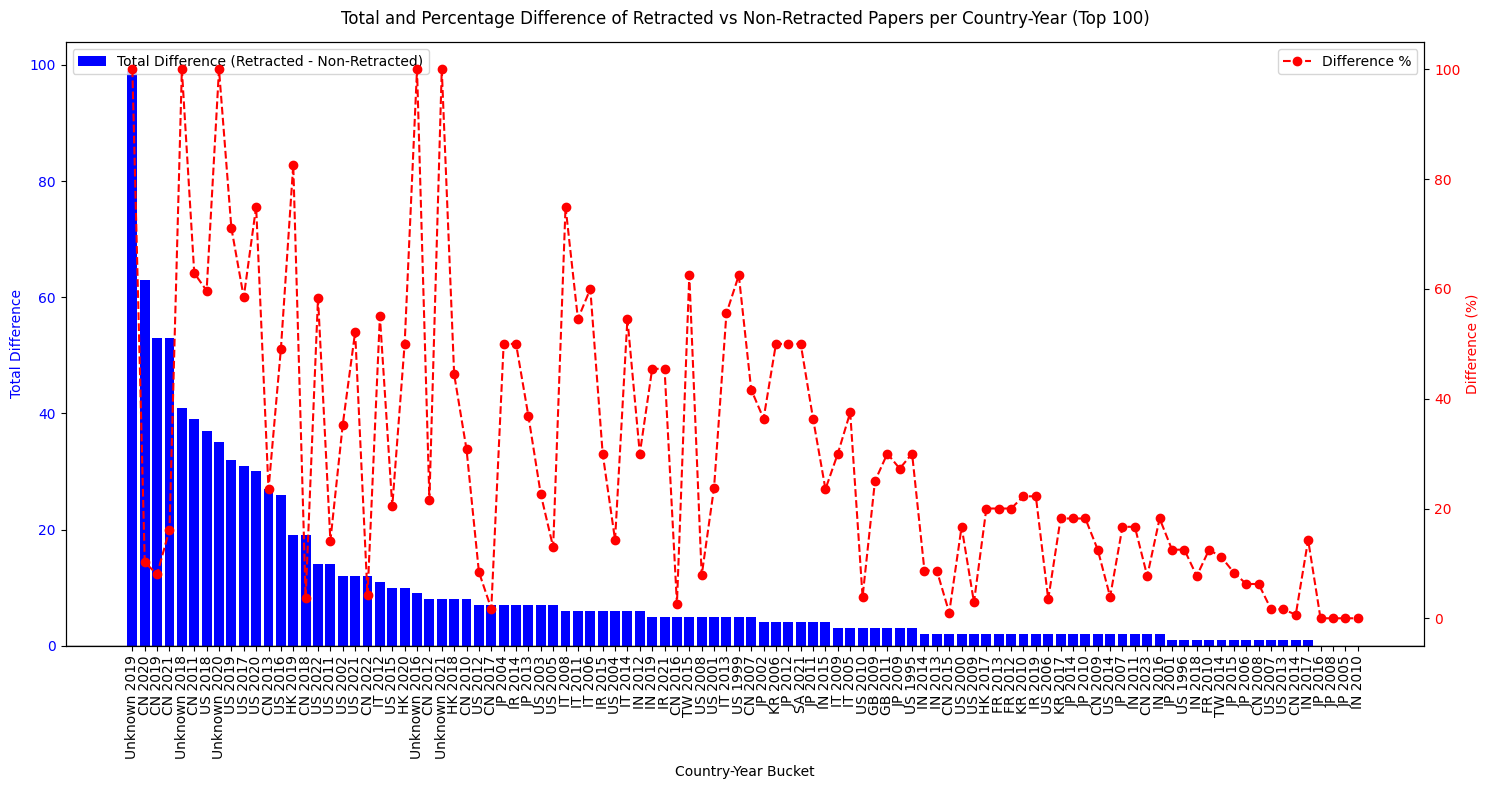

In [66]:

# Limit to the top 100 buckets with the greatest number of either retracted or non-retracted papers

df_largest_difference = df_differences.nlargest(100, ['retracted_count', 'non_retracted_count'])

# Sort by absolute total difference in descending order

df_largest_difference = df_largest_difference.sort_values(by='difference', key=abs, ascending=False)

# Create figure

fig, ax1 = plt.subplots(figsize=(15, 8))

# Generate x-axis positions

x_labels = df_largest_difference['country'] + ' ' + df_largest_difference['year'].astype(str)
x_positions = np.arange(len(x_labels))

# Create bar plot for total difference

ax1.bar(x_positions, abs(df_largest_difference['difference']), color='blue', label='Total Difference (Retracted - Non-Retracted)')
ax1.set_xlabel('Country-Year Bucket')
ax1.set_ylabel('Total Difference', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(x_positions)
ax1.set_xticklabels(x_labels, rotation=90)

# Create second y-axis for percentage difference

ax2 = ax1.twinx()
ax2.plot(x_positions, abs(df_largest_difference['difference_percentage']), color='red', marker='o', linestyle='dashed', label='Difference %')
ax2.set_ylabel('Difference (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legend

fig.suptitle('Total and Percentage Difference of Retracted vs Non-Retracted Papers per Country-Year (Top 100)')
ax1.axhline(0, color='black', linewidth=1)
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot

plt.show()



Finally, it will also be useful to visualize and compare the distribution of both retracted and non-retracted papers per year, aggregating over the different countries in which papers with the same year of publication were published:

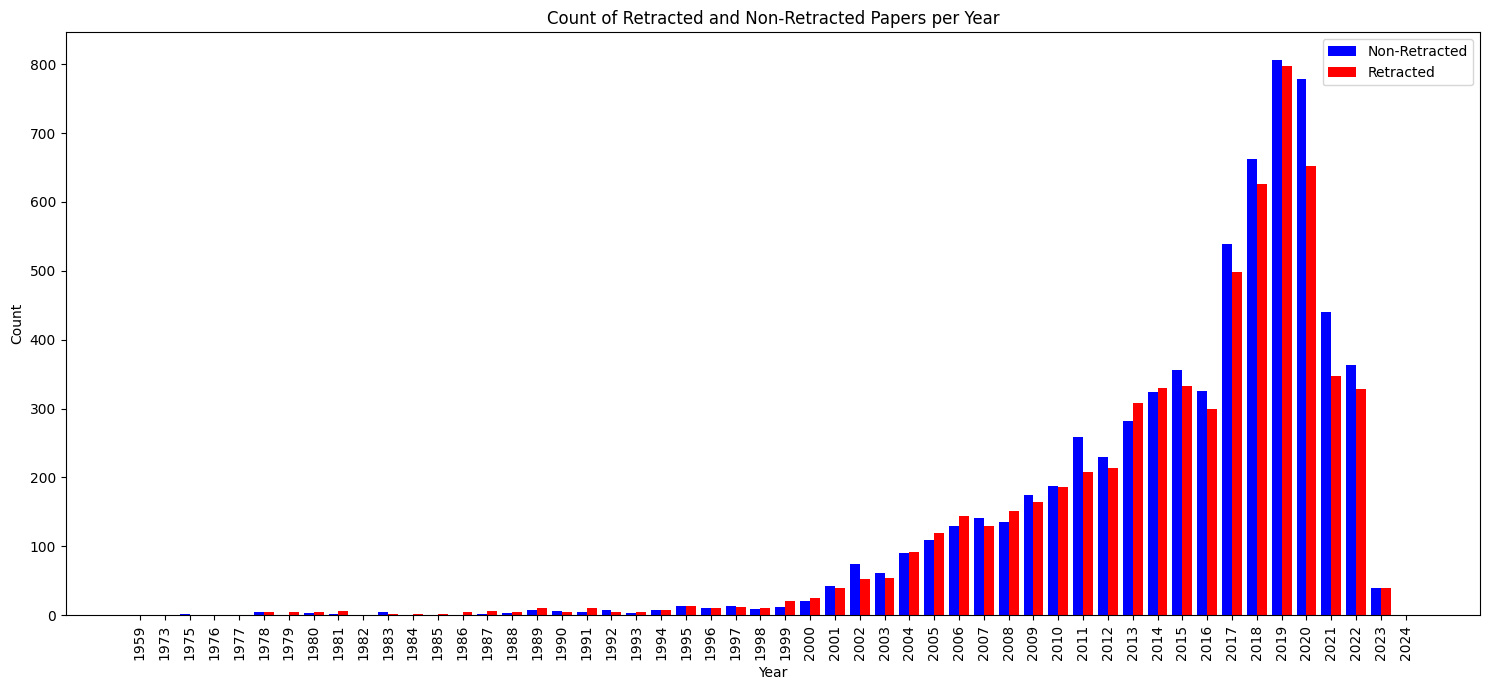

In [47]:

# Aggregate data to get total counts per year

df_yearly_count = df_differences.groupby('year').sum(numeric_only=True).reset_index()

# Generate unique x positions for each year

x_labels = df_yearly_count['year'].astype(str)
x_positions = np.arange(len(x_labels))

# Initialize plot

plt.figure(figsize=(15, 7))

# Plot bars for non-retracted and retracted counts

plt.bar(x_positions - 0.2, df_yearly_count['non_retracted_count'], width=0.4, label='Non-Retracted', color='blue')
plt.bar(x_positions + 0.2, df_yearly_count['retracted_count'], width=0.4, label='Retracted', color='red')

# Formatting

plt.title('Count of Retracted and Non-Retracted Papers per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(x_positions, x_labels, rotation=90)
plt.legend()
plt.tight_layout()

# Show the plot

plt.show()


And to do the same with the total number of retracted and non-retracted papers from each country, aggregating over the different years in which papers from the same country were published:

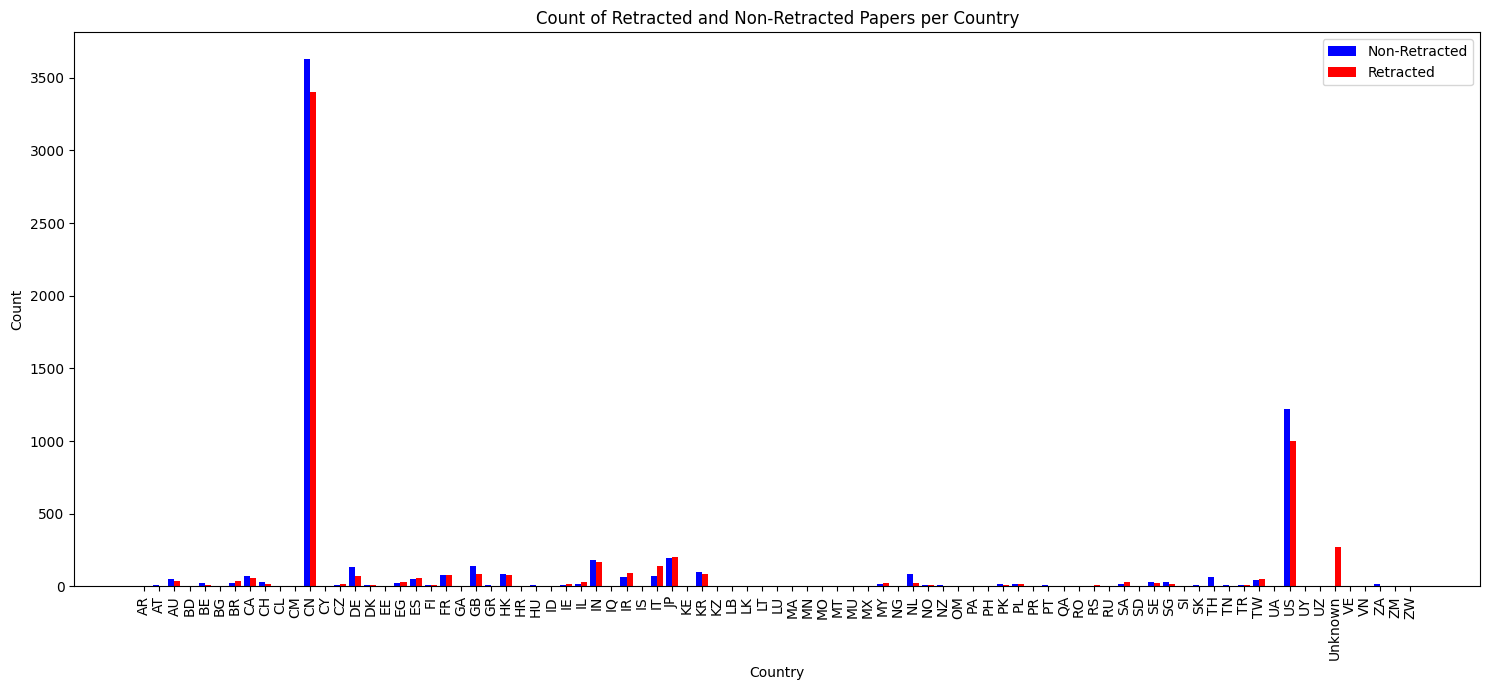

In [68]:

# Aggregate data to get total counts per country

df_count_by_country = df_differences.groupby('country').sum(numeric_only=True).reset_index()

# Generate unique x positions for each country

x_labels = df_count_by_country['country'].astype(str)
x_positions = np.arange(len(x_labels))

# Initialize plot

plt.figure(figsize=(15, 7))

# Plot bars for non-retracted and retracted counts

plt.bar(x_positions - 0.2, df_count_by_country['non_retracted_count'], width=0.4, label='Non-Retracted', color='blue')
plt.bar(x_positions + 0.2,df_count_by_country['retracted_count'], width=0.4, label='Retracted', color='red')

# Formatting

plt.title('Count of Retracted and Non-Retracted Papers per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(x_positions, x_labels, rotation=90)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

## Generating Final Corpus

Having confirmed that the country and year distribution of our papers is sufficiently even, we can go ahead and generate a single data frame with the corpus that we will use to train our data set:

In [46]:

# Concatenate data frames with abstracts with both retracted and non-retracted papers

df_corpus = pd.concat([df_retracted, df_non_retracted], ignore_index=True)

# Reshuffle rows to mix retracted and non-retracted texts

df_corpus = df_corpus.sample(frac=1).reset_index(drop=True)

# Enforce integer type for target

df_corpus['target'] = df_corpus['target'].astype(int)

# Visualize corpus data frame

df_corpus.head()


,abstract_text,target,doi,country,year,ret_flag
0,"""Atrial fibrosis occurs frequently with struct...",1,10.1038_s41420-022-00895-9,CN,2022,False
1,"""In Brief Purpose To determine the safety and ...",1,10.1097_00006982-200402000-00018,US,2004,False
2,"""Biglycan (BGN) is an important component of t...",0,10.1016_j.molonc.2016.08.002,CN,2016,False
3,"""Fusarium wilt caused by Fusarium oxysporum f....",0,10.3390_toxins12040254,CN,2020,False
4,"""The genome of Stenotrophomonas maltophilia en...",1,10.1128_JB.00310-07,IE,2007,False


## Output

To conclude, we will save the corpus stored in our data frame into a .csv file:

In [47]:

# Save content of data frame to .csv

df_corpus.to_csv(output_path, sep=',', index=False)
